In [1]:
%load_ext autoreload
%autoreload

import sys

sys.path.append("../../../GaussNeuro")
import gaussneuro as lib

sys.path.append("../fit/")
import synthetic

import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import numpy as np


import analyze_synthetic

/var/home/dl543/Documents/Learning/nonparametric-modulated-renewal/scripts/analysis/../../../GaussNeuro/gaussneuro/likelihoods/renewal.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update("jax_enable_x64", True)

seed = 123
rng = np.random.default_rng(seed)
prng_state = jr.PRNGKey(seed)
batch_size = 10000

## Data

In [3]:
### data ###
data_path = "../../data/synthetic/"
session_name = "syn_data_seed123"
max_ISI_order = 4

select_fracs = [0.0, 1.0]

dataset_dict = synthetic.spikes_dataset(session_name, data_path, max_ISI_order, select_fracs)

#covariates = dataset_dict['covariates']
#x_t, y_t = covariates['x'], covariates['y']


In [4]:
ISI_order = 4
reg_config_names = [
    'syn_data_seed123ISI4sel0.0to1.0_PP-log__factorized_gp-16-1000_X[x-y]_Z[]', 
    'syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]'.format(ISI_order), 
]

tuning_model_name = reg_config_names[-1]

checkpoint_dir = '../checkpoint/'

In [5]:
regression_dict = analyze_synthetic.regression(
    checkpoint_dir, reg_config_names, dataset_dict, rng, prng_state, batch_size
)

Analyzing regression for syn_data_seed123ISI4sel0.0to1.0_PP-log__factorized_gp-16-1000_X[x-y]_Z[]...
Analyzing regression for syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]...


In [5]:
tuning_dict = analyze_synthetic.tuning(
    checkpoint_dir, tuning_model_name, dataset_dict, rng, prng_state, batch_size
)

Analyzing tuning for syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt
plt.style.use(['../plots/paper.mplstyle'])

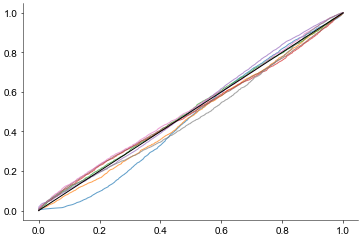

NameError: name 'train_ell' is not defined

In [14]:
sort_cdfs = regression_dict['KS_quantiles']

for n in range(len(sort_cdfs)):
    if sort_cdfs[n] is not None:
        plt.plot(np.linspace(0., 1., len(sort_cdfs[n])), sort_cdfs[n], alpha=0.7)
plt.plot(np.linspace(0., 1., 100), np.linspace(0., 1., 100), c='k')
plt.show()

print(train_ell, test_lpd)